# Normalizing energy consumption of buildings to be able to compare them to each other

- Created by Clayton Miller - clayton@nus.edu.sg - miller.clayton@gmail.com

Buildings come in all shapes, sizes and uses. It is difficult to compare the energy consumption of two buildings if they are not similar in these ways as it wouldn't be an *apples to apples* comparison. In order to compare buildings of different uses, sizes, and climates -- we have to do a process called `normalization`.



## The question -- how can we compare the energy consumption of buildings that are different sizes, from different climates, etc.?

To get started with this task, we can use the the BDG data set from several buildings. First we'll load the libraries and data once again.


In [1]:
import pandas as pd
#from google.colab import drive
import os

In [2]:
%matplotlib inline

In [3]:
#drive.mount('/content/gdrive')
#os.chdir("meter_data")

In [4]:
buildingname = "Office_Abbey"

In [5]:
rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp')

In [6]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Office_Abbey  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [7]:
rawdata.head()

,Office_Abbey
timestamp,
2015-01-01 00:00:00,27.79
2015-01-01 01:00:00,27.66
2015-01-01 02:00:00,27.13
2015-01-01 03:00:00,27.34
2015-01-01 04:00:00,27.34


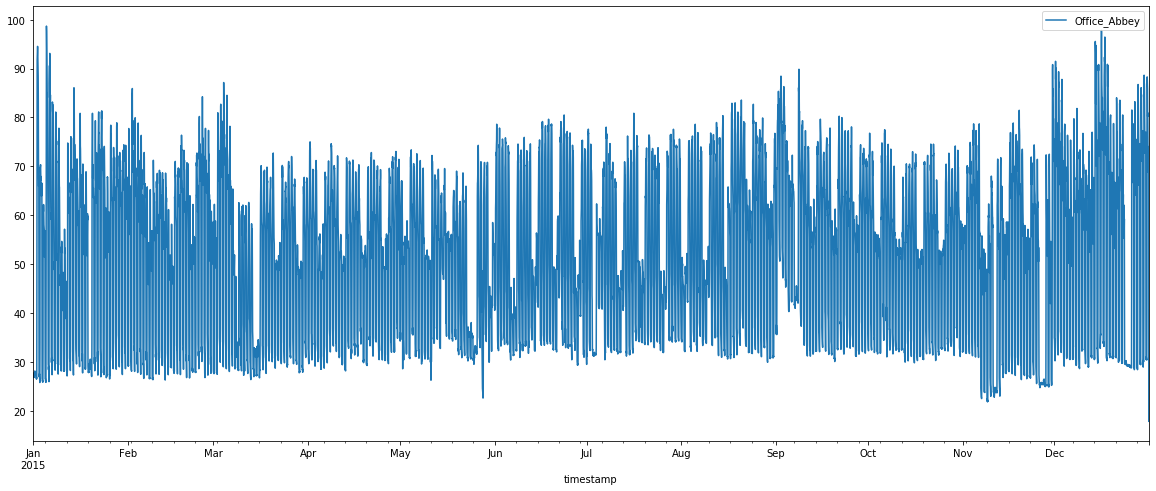

In [8]:
rawdata.plot(figsize=(20,8));

# Normalization based on floor area

One of the most simple ways of normalization is to simply divide energy consumption by the floor area to create the Energy Use Intensity (EUI). This metric takes energy and simply divides by the floor area (in ft2 or m2)

In [9]:
meta = pd.read_csv("all_buildings_meta_data.csv", index_col="uid")

In [10]:
meta.head()

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv


## Extract meta data from another file

You can see in the meta data file that there are various attributes that we can use to normalize the building consumption -- including `sqm` or size of the building

In [18]:
meta.shape

(507, 18)

In [19]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, PrimClass_Everett to UnivLab_Aoife
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   dataend                 507 non-null    object 
 1   datastart               507 non-null    object 
 2   energystarscore         26 non-null     float64
 3   heatingtype             124 non-null    object 
 4   industry                507 non-null    object 
 5   mainheatingtype         122 non-null    object 
 6   numberoffloors          124 non-null    float64
 7   occupants               105 non-null    float64
 8   primaryspaceusage       507 non-null    object 
 9   rating                  131 non-null    object 
 10  sqft                    507 non-null    float64
 11  sqm                     507 non-null    float64
 12  subindustry             507 non-null    object 
 13  timezone                507 non-null    object 
 14  yearbuilt            

In [21]:
meta.iloc[1]

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage          College Classroom
rating                                   NaN
sqft                                   56969
sqm                                  5292.59
subindustry               College/University
timezone                    America/New_York
yearbuilt                               1967
nickname                            Clifford
primaryspaceuse_abbrev             UnivClass
newweatherfilename              weather2.csv
Name: UnivClass_Clifford, dtype: object

In [ ]:
meta.loc[buildingname]["sqm"]

Now we normalize using area by using a vector operation and resampling to monthly data.

In [ ]:
rawdata.head()

In [ ]:
rawdata_normalized = rawdata/meta.loc[buildingname]["sqm"]

In [ ]:
rawdata_normalized.head()

In [ ]:
rawdata_normalized_monthly = rawdata_normalized.resample("M").sum()

In [ ]:
rawdata_normalized_monthly.plot(kind="bar", figsize=(10,4), title='Energy Consumption per Square Meter Floor Area')

# Automation of the process of analysis on multiple buildings

Normalization is really about the ability to compare a diverse set of buildings

Now we load 6 buildings to extract and normalize the data. Since the normalization process is most useful on a set of buildings, we will load six of the BDG buildings as an example to showcase the comparison.

In [ ]:
buildingnamelist = ["Office_Abbey",
"Office_Pam",
"Office_Penny",
"UnivLab_Allison",
"UnivLab_Audra",
"UnivLab_Ciel"]

In [ ]:
annual_data_list = []
annual_data_list_normalized = []

In [ ]:
for buildingname in buildingnamelist:
    print("Getting data from: "+buildingname)
    
    rawdata = pd.read_csv(buildingname+".csv", parse_dates=True, index_col='timestamp')
    floor_area = meta.loc[buildingname]["sqm"]
    
    annual = rawdata.sum()

    normalized_data = rawdata/floor_area
    annual_normalized = normalized_data.sum()
    
    annual_data_list_normalized.append(annual_normalized)
    annual_data_list.append(annual) 

In [ ]:
totaldata = pd.concat(annual_data_list)
totaldata_normalized = pd.concat(annual_data_list_normalized)

In [ ]:
totaldata

In [ ]:
totaldata_normalized

## Unnormalized energy consumption

As you can see from the annual totals of energy consumption, the Lab named *Ciel* uses a lot of energy as compared to the other buildings!

In [ ]:
totaldata.plot(kind='bar',figsize=(10,5))

## Normalized Energy Consumption

However, when normalized using floor area, *Ciel* is not the highest consumer

In [ ]:
totaldata_normalized.plot(kind='bar',figsize=(10,5))